In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [4]:
# from sklearn.datasets import load_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('dataset2.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df.head()

,Site,Class Rev,Payload Total (GB),Traffic,Subs,Revenue
0,Site 1,Gold,30419,1765,1414,134017424
1,Site 2,Silver,13872,1685,731,62952270
2,Site 3,Gold,28531,1070,1206,120884649
3,Site 4,Bronze,10777,911,761,54450496
4,Site 5,Bronze,10990,1418,934,53238883


In [6]:
test_X = df.iloc[:,2:5].values
print(test_X.shape)

(593, 3)


In [7]:
X = df.iloc[:,2:5].values
Y = df.iloc[:,[1]].values

In [8]:
print(Y)

[['Gold']
 ['Silver']
 ['Gold']
 ['Bronze']
 ['Bronze']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Bronze']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Bronze']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Bronze']
 ['Gold']
 ['Bronze']
 ['Bronze']
 ['Bronze']
 ['Bronze']
 ['Bronze']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Diamond']
 ['Silver']
 ['Gold']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Bronze']
 ['Silver']
 ['Bronze']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Bronze']
 ['Gold']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Platinum']
 ['Bronze']
 ['Bronze']
 ['Silver']
 ['Silver']
 ['Bronze']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Gold']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Bronze']
 ['Bronze']
 ['Gold

In [9]:
target_names = df['Class Rev'].unique()
print(target_names)

['Gold' 'Silver' 'Bronze' 'Diamond' 'Platinum']


In [10]:
print(X.shape)
print(Y.shape)

(593, 3)
(593, 1)


In [11]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, random_state=3, test_size=0.3)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(415, 3)
(178, 3)
(415, 1)
(178, 1)


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 11.0 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=cd011d5d55b2625721d102d93844b24e03d399fbb5347ff1b951b33eff342697
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [12]:
# import the necessary packages
from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
# from keras.layers.core import Flatten
from keras.layers.core import Dense
#from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from PIL import Image
# from imutils import paths
# import numpy as np
# import os
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
Y

array([['Gold'],
       ['Silver'],
       ['Gold'],
       ['Bronze'],
       ['Bronze'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Gold'],
       ['Silver'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Silver'],
       ['Bronze'],
       ['Silver'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Silver'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Bronze'],
       ['Bronze'],
       ['Bronze'],
       ['Bronze'],
       ['Bronze'],
       ['Gold'],
       ['Gold'],
       ['Silver'],
       ['Silver'],
       ['Gold'],
       ['Diamond'],
       ['Silver'],
       ['Gold'],
       ['Gold'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Bronze'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Gold'],
       ['Gold'],
       ['Silver'],
       ['Silver']

In [14]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
print(labels)

[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 ...
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


In [15]:
(trainX, testX, trainY, testY) = train_test_split(X, np.array(labels), test_size=0.4)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(355, 3)
(238, 3)
(355, 5)
(238, 5)


In [16]:
model = keras.Sequential()
model.add(layers.Dense(5, kernel_initializer='uniform', input_shape=(3,)))
model.add(layers.Activation('softmax'))

In [17]:
#model ANN

model = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(3,)), #hidden layer 1
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(5, activation = "softmax"),
    ]
)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                256       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 5)                 85        
                                                                 
Total params: 2,949
Trainable params: 2,949
Non-trainable params: 0
_________________________________________________________________


In [21]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=100)

[INFO] training network...
Epoch 1/100
4/4 [==============================] - 1s 75ms/step - loss: 78.6909 - accuracy: 0.2930 - val_loss: 28.5980 - val_accuracy: 0.4370
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 30.4878 - accuracy: 0.4197 - val_loss: 27.5768 - val_accuracy: 0.0966
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 22.0673 - accuracy: 0.3070 - val_loss: 44.4010 - val_accuracy: 0.3950
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 43.4226 - accuracy: 0.3549 - val_loss: 38.1617 - val_accuracy: 0.3950
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 33.1535 - accuracy: 0.4254 - val_loss: 29.7942 - val_accuracy: 0.3697
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 26.4423 - accuracy: 0.3634 - val_loss: 18.4456 - val_accuracy: 0.3992
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 13.8751 - accuracy: 0.4282 - val_loss: 7.2890 - v

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


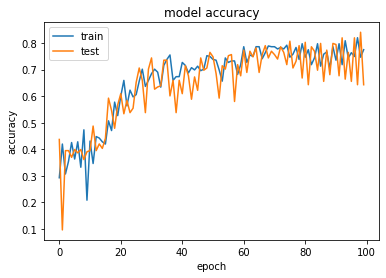

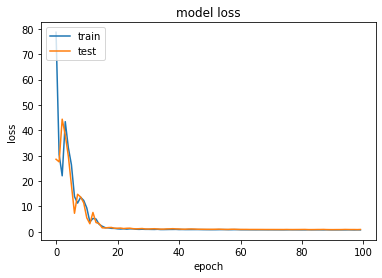

In [22]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
#TES IMPLEMENTASI
df2 = pd.read_csv('tes implementasi.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df2.head()

,Site,Class Rev,Payload Total (GB),Traffic,Subs,Revenue,Prediksi ANN
0,Site 601,Silver,12236,1892,1173,72323800,?
1,Site 602,Bronze,6548,1129,280,38331569,?
2,Site 603,Gold,29338,3391,2423,159013510,?
3,Site 604,Gold,21707,1702,1353,109470028,?
4,Site 605,Silver,16365,1126,967,88936249,?


In [24]:
test_Z = df2.iloc[:,2:5].values.astype(float)
print(test_Z.shape)

(100, 3)


In [25]:
predict = model.predict(test_Z)
print(predict)

[[3.65504473e-02 2.55707558e-03 3.52958888e-01 7.87123740e-02
  5.29221296e-01]
 [5.70735812e-01 1.87298153e-02 7.23005310e-02 1.92426965e-02
  3.18991095e-01]
 [7.31236923e-06 2.34037657e-06 8.11093569e-01 1.10304341e-01
  7.85924047e-02]
 [1.28672260e-03 1.61636330e-04 6.42066240e-01 1.09813996e-01
  2.46671364e-01]
 [1.74557324e-02 1.36138103e-03 4.66493428e-01 9.30929258e-02
  4.21596467e-01]
 [7.81717896e-02 4.54777526e-03 3.21632951e-01 7.16678649e-02
  5.23979664e-01]
 [3.63778742e-03 3.92690010e-04 5.42668581e-01 1.03496060e-01
  3.49804938e-01]
 [5.25618136e-01 1.82288643e-02 7.28682727e-02 2.01057177e-02
  3.63179058e-01]
 [9.88680085e-07 4.61234350e-07 8.39678407e-01 1.07357949e-01
  5.29622696e-02]
 [6.24646376e-11 1.52873634e-12 2.52453938e-05 5.47692245e-16
  9.99974728e-01]
 [8.09017511e-05 1.58140356e-05 7.81194866e-01 1.09752484e-01
  1.08955935e-01]
 [1.20790578e-01 6.55062823e-03 2.38086894e-01 5.79725392e-02
  5.76599360e-01]
 [2.81841695e-01 1.22077111e-02 1.542459

In [26]:
print(lb.classes_[predict.argmax(axis=1)])

['Silver' 'Bronze' 'Gold' 'Gold' 'Gold' 'Silver' 'Gold' 'Bronze' 'Gold'
 'Silver' 'Gold' 'Silver' 'Silver' 'Silver' 'Silver' 'Gold' 'Silver'
 'Bronze' 'Gold' 'Gold' 'Bronze' 'Gold' 'Silver' 'Gold' 'Silver' 'Gold'
 'Bronze' 'Bronze' 'Bronze' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Silver' 'Gold' 'Silver' 'Silver'
 'Gold' 'Gold' 'Silver' 'Silver' 'Gold' 'Silver' 'Gold' 'Gold' 'Silver'
 'Silver' 'Gold' 'Gold' 'Gold' 'Silver' 'Gold' 'Gold' 'Silver' 'Gold'
 'Gold' 'Gold' 'Gold' 'Silver' 'Silver' 'Silver' 'Bronze' 'Silver'
 'Silver' 'Silver' 'Gold' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Silver' 'Gold' 'Silver' 'Gold' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Gold' 'Silver' 'Silver' 'Silver' 'Gold'
 'Gold' 'Gold' 'Silver' 'Bronze']
